*__Multi-task (multi-output) learning__ is a supervised learning in which multiple learning tasks are solved
simultaneously. In our case, 4 tasks, presumably correlated, are being predicted.*

*Multi-task frameworks seek to benefit from the information every task presents. Let us apply primary analysis on
our tasks to find out whether they are related to each other.*

In [1]:
import warnings

warnings.filterwarnings('ignore') 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style(style='ticks')

Define the tasks.

In [3]:
TASKS = np.array([
    'Log(LD50)',
    'MeltingPoint',
    'RefractiveIndex',
    'BoilingPoint',
])

Load only the tasks from the data set. 

In [4]:
targets_df = pd.read_csv(
    '../data/nitrocom_multitask_reg.csv',
    usecols=TASKS,
)

targets_df.describe()

Log(LD50)  MeltingPoint  RefractiveIndex  BoilingPoint
count  90.000000     90.000000        90.000000     90.000000
mean    2.409856    118.456024         1.602226    360.660476
std     0.876534     66.343811         0.063397    101.528640
min     1.077000     -2.500000         1.439000    113.500000
25%     1.761000     70.250000         1.558000    306.275000
50%     2.227500    118.456024         1.601613    350.950000
75%     2.868000    150.375000         1.638000    390.725000
max     5.184000    300.000000         1.751000    796.700000

*At first glance, there is only a weak relationship.
Probably, task-wise scaling will help.*

Let's see how they are distributed.

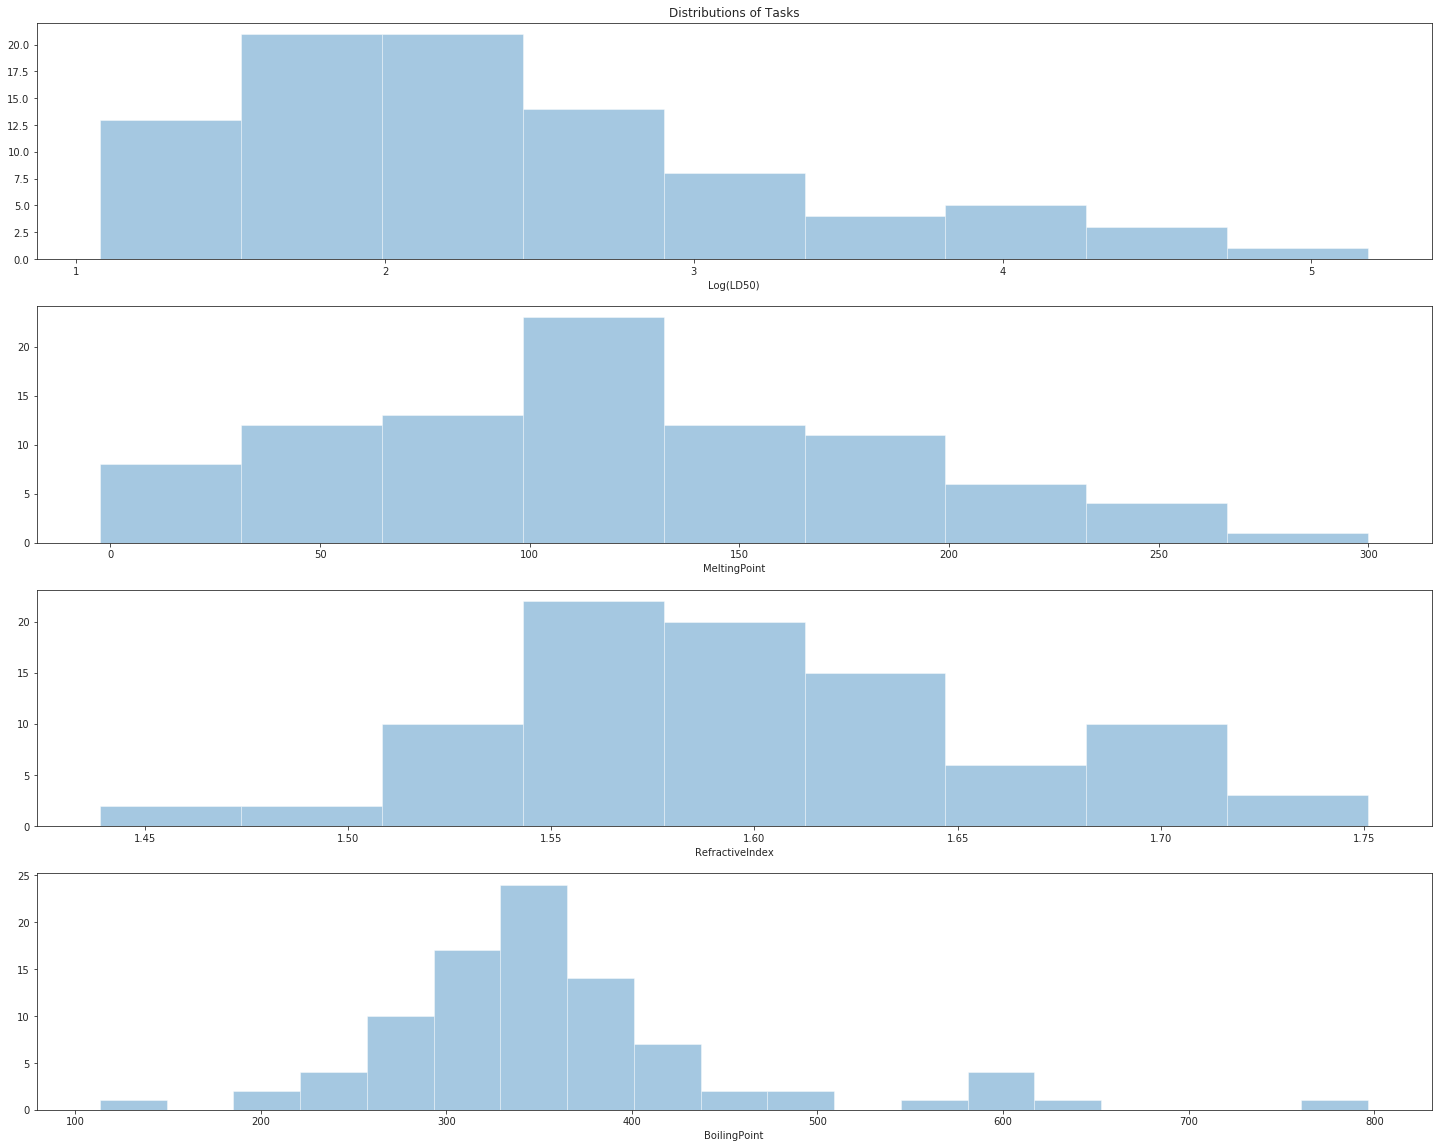

In [5]:
fig, axes = plt.subplots(len(TASKS), 1, figsize=(25, 20))
axes = axes.ravel()

for i, ax in enumerate(axes):
    sns.distplot(targets_df[TASKS[i]], ax=ax, kde=False)

axes[0].set_title('Distributions of Tasks')
plt.show()

*Each distribution somehow resembles normal distribution.*

What about pairwise relationship?

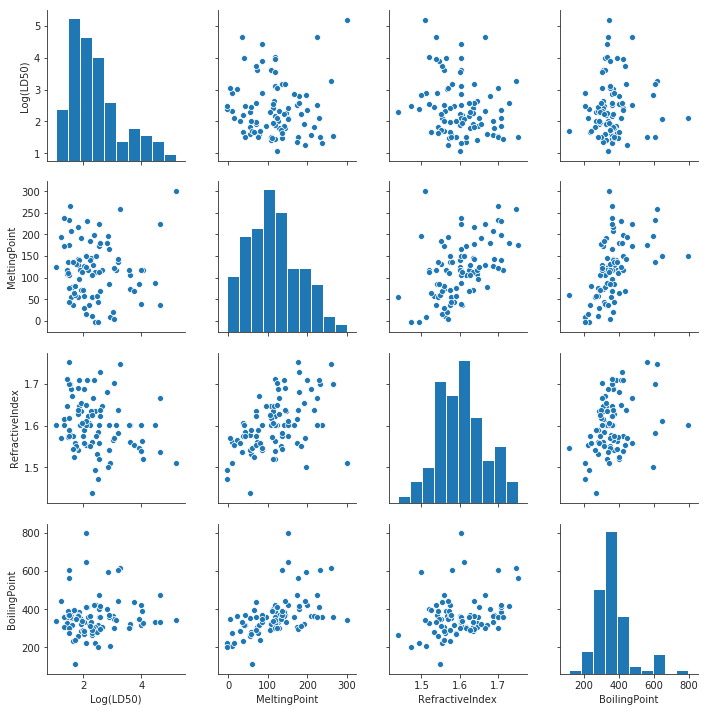

In [6]:
sns.pairplot(targets_df)

plt.show()

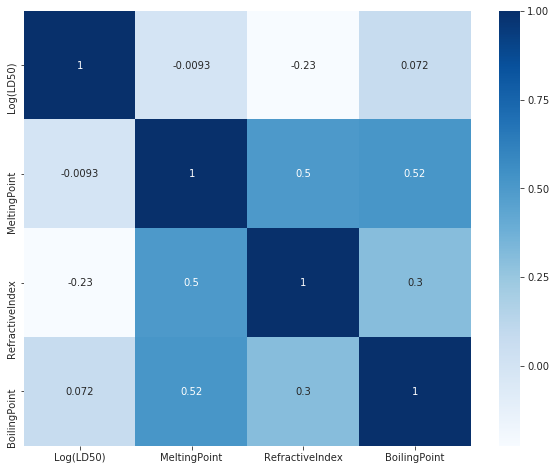

In [7]:
plt.figure(figsize=(10, 8))

sns.heatmap(targets_df.corr(), annot=True, cmap='Blues')

plt.show()

*Can we conclude that __LD50__ won't have any effect on the generalization of our models? Well, it is not obvious,
since in our arsenal, we have at least one robust model capable to attack such cases.*

Finally, let's apply target-wise transformations. Similarly with feature-wise transformations, they reduce overfitting
and accelerate convergence. We choose __Yeo-Johnson__ power transformation technique,
since it can be applied to both positive and negative values.

In [8]:
from nitrocomchem.transformer import YeoJohnsonTransformer

/home/linux-mint-science/conda/miniconda3/envs/deepchem/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
TASKS_MASK = np.array([
    False,
    True,
    True,
    True,
])

yeo_johnson_transformer = YeoJohnsonTransformer()
y_t = yeo_johnson_transformer.fit_transform(targets_df[TASKS[TASKS_MASK]])

y_t.shape

(90, 3)

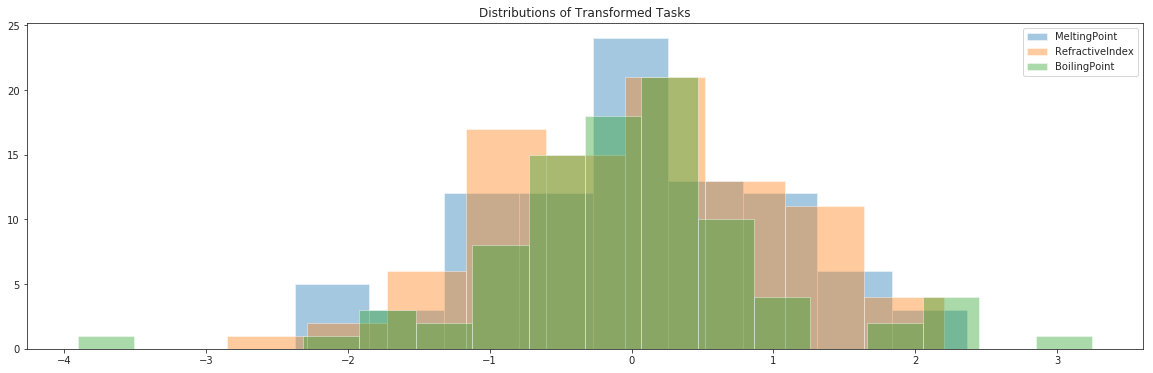

In [16]:
plt.figure(figsize=(20, 6))

for i, task_name in enumerate(TASKS[TASKS_MASK]):
    sns.distplot(y_t[:, i], kde=False, label=task_name)

plt.title('Distributions of Transformed Tasks')
plt.legend()
plt.show()